# Handling Outliers and Basic Exploratory Analysis

***The main purpose of this project is to practice, and demonstrate knowledge of data cleaning, working with stakeholders to achieve a business objective, and data analytics***

In [258]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [259]:
# Load the dataframe
file = input('Enter the name of the file without the extension: ')
# finals_file = input('Enter the name of the finals semester without the extension: ')

Enter the name of the file without the extension: ods_072021_v04


In [260]:
ods = pd.read_pickle(f'{file}.pkl')

*We need to add another column that lists the day of the week*

In [261]:
# Add another column that displays the day of the week
ods['name_of_day'] = ods['exam_date'].dt.day_name()

In [262]:
# Check implementation
ods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11216 entries, 0 to 11239
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   subject                 11216 non-null  object        
 1   section                 11216 non-null  int64         
 2   exam_date               11216 non-null  datetime64[ns]
 3   proctor                 11216 non-null  object        
 4   room_number             11216 non-null  string        
 5   start_time              11216 non-null  datetime64[ns]
 6   end_time                11216 non-null  datetime64[ns]
 7   actual_start            11216 non-null  datetime64[ns]
 8   actual_end              11216 non-null  datetime64[ns]
 9   first_entered           11216 non-null  datetime64[ns]
 10  fileUploaded            11216 non-null  object        
 11  received_as_paper_copy  11216 non-null  object        
 12  rescheduled             11216 non-null  float6

## *Basic Summary Statistics and Outliers for Regular Semester Exams*

In [263]:
ods[['allotted_time', 'actual_time', 'requested_in_advance']].describe()

,allotted_time,actual_time,requested_in_advance
count,11216.000000,7682.000000,11216.000000
mean,144.398805,86.366701,40.477443
std,122.298331,55.912566,34.642417
min,0.000000,0.000000,-4.000000
25%,100.000000,48.000000,8.000000
50%,120.000000,76.000000,31.000000
75%,150.000000,112.000000,69.000000
max,5070.000000,642.000000,123.000000


*A few noticeable issues and questions:*
1. 5070 minutes is too much time allotted_time for one student
2. 642 minutes is too much actual_time for one student
3. Why do we have an exam that was scheduled -4 days in advance
4. Did a student really schedule an exam 123 days in advance? It is possible
5. There shouldn't be a value of zero for allotted_time and actual_time

### 5070 Minute Allotted Time

*What exams were these for, and when did they happen?*

In [264]:
ods.loc[ods['allotted_time'] == 5070, ['subject', 'allotted_time', 'exam_date', 'extra_time_1.50x', 'extra_time_2.00x']]

,subject,allotted_time,exam_date,extra_time_1.50x,extra_time_2.00x
7064,ENGR,5070.0,2020-01-28,No,No
8212,ENGR,5070.0,2020-02-18,No,No
9229,ENGR,5070.0,2020-03-10,No,No
10201,ENGR,5070.0,2020-04-14,No,No
10343,ENGR,5070.0,2020-04-17,No,No


*Since we are unable to use student identifiers, we need to use the portal to look up who the students are and who the teacher is to verify allotted_time. The ODS portal is the information system ODS uses to process testing and accommodation data*

***The exams in question all belong to one student, and for the same teacher. According to the exam agreement, the length of the exam (without extended time) was 70 minutes, and the student did not have an extended time accommodation. Thus, we can replace these values with 5070***

In [265]:
# Assign the correct values for all instances of this exam
ods.loc[7064, ['allotted_time']] = 70
ods.loc[8212, ['allotted_time']] = 70
ods.loc[9229, ['allotted_time']] = 70
ods.loc[10201, ['allotted_time']] = 70
ods.loc[10343, ['allotted_time']] = 70

*The highest amount of time allotted for exams are for GBA finals, which are 480 minutes?*

In [266]:
ods.loc[ods['allotted_time'] > 480]

,subject,section,exam_date,proctor,room_number,start_time,end_time,actual_start,actual_end,first_entered,...,extra_time_2.00x,makeup_accommodation,noScantronExam,readerForExams,allotted_time,actual_time,exam_cancelled,no_show,requested_in_advance,name_of_day
4795,HY,28,2019-12-10,Bulls,46,2019-12-10 13:00:00,2019-12-10 23:00:00,2019-12-10 13:00:00,2019-12-10 16:28:00,2019-12-06 17:04:00,...,Yes,No,No,Yes,600.0,208.0,False,False,4,Tuesday
5693,AEM,100,2019-08-01,Bulls,05,2019-08-01 08:00:00,2019-08-01 18:00:00,2019-08-01 08:00:00,2019-08-01 18:00:00,2019-07-23 11:26:00,...,No,No,No,No,600.0,NaN,False,True,9,Thursday
5705,ECE,150,2019-08-01,Bulls,18,2019-08-01 08:00:00,2019-08-01 18:00:00,2019-08-01 08:24:00,2019-08-01 12:48:00,2019-07-31 10:41:00,...,No,No,No,No,600.0,264.0,False,False,1,Thursday
5736,KIN,100,2019-08-02,Bulls,19,2019-08-02 08:00:00,2019-08-02 18:00:00,2019-08-02 08:14:00,2019-08-02 08:38:00,2019-08-01 08:47:00,...,No,No,No,No,600.0,24.0,False,False,1,Friday
6969,OM,320,2020-12-09,Vanslambrouck,01,2020-12-09 12:15:00,2020-12-09 22:15:00,2020-12-09 12:14:00,2020-12-09 15:14:00,2020-12-04 13:10:00,...,Yes,No,No,No,600.0,180.0,False,False,5,Wednesday
7643,PHL,1,2020-02-10,Bulls,31,2020-02-10 10:00:00,2020-02-10 22:30:00,2020-02-10 10:00:00,2020-02-10 22:30:00,2020-01-16 21:17:00,...,No,No,Yes,No,750.0,NaN,True,False,25,Monday
9533,PHL,1,2020-03-13,Unspecified,11,2020-03-13 10:00:00,2020-03-13 22:30:00,2020-03-13 10:00:00,2020-03-13 22:30:00,2020-01-16 21:17:00,...,No,No,Yes,No,750.0,NaN,True,False,57,Friday


*(Research done in ODS Portal)*
1. For HY 28, the instructor did not list the final exam amount, but since most finals are 2.5 hours (150 minutes), its likely that the instructor simply added the extra time in before inputing the amount in the portal, then the system added the extra time on top of that - *Change HY 28 allotted_time to 300*
2. For AEM it is the sam problem. The extra time likely got added on preemptively by the instructor - *Change AEM 100 to 300*
3. Same for ECE - *Change ECE 150 to 300*
4. Same for KIN; this case was interesting considering that the instructor input the correct time on another exam in the same exact course but for another student, illustrating how easy it is for bad data to show up in our dataset - *Change KIN 100 to 300*
5. Same for OM 320 - *Change OM 320 to 300*
6. Neither instances of PHL appear in the portal. I am not sure why this is. They could've been cancelled early in the process - *Drop both occurences of PHL 1*

In [267]:
ods.loc[4795, ['allotted_time']] = 300
ods.loc[5693, ['allotted_time']] = 300
ods.loc[5705, ['allotted_time']] = 300
ods.loc[5736, ['allotted_time']] = 300
ods.loc[6969, ['allotted_time']] = 300
ods.drop(index=7643, inplace=True)
ods.drop(index=9533, inplace=True)

### 642 Actual Time

*The highest time a student should have taken for exams is 480, which were GBA finals. Why do we have exams over that?*

In [268]:
ods[ods['actual_time'] > 480]

,subject,section,exam_date,proctor,room_number,start_time,end_time,actual_start,actual_end,first_entered,...,extra_time_2.00x,makeup_accommodation,noScantronExam,readerForExams,allotted_time,actual_time,exam_cancelled,no_show,requested_in_advance,name_of_day
4672,ECE,1,2019-12-10,Bulls,33,2019-12-10 08:00:00,2019-12-10 13:00:00,2019-12-10 08:00:00,2019-12-10 16:59:00,2019-12-06 07:41:00,...,Yes,No,No,No,300.0,539.0,False,False,4,Tuesday
4691,ME,2,2019-12-10,Bulls,Virtual Room (Finals Only),2019-12-10 08:00:00,2019-12-10 13:00:00,2019-12-10 08:00:00,2019-12-10 16:37:00,2019-09-26 16:33:00,...,Yes,No,No,No,300.0,517.0,False,False,75,Tuesday
4706,HD,1,2019-12-10,Unspecified,Virtual Room (Finals Only),2019-12-10 08:05:00,2019-12-10 14:05:00,2019-12-10 08:05:00,2019-12-10 17:47:00,2019-09-05 15:27:00,...,Yes,No,No,No,360.0,582.0,False,False,96,Tuesday
5002,EN,14,2019-12-11,Bulls,30,2019-12-11 10:00:00,2019-12-11 15:00:00,2019-12-11 10:02:00,2019-12-11 20:41:00,2019-09-10 07:41:00,...,Yes,No,No,No,300.0,639.0,False,False,92,Wednesday
5004,FI,322,2019-12-11,Bulls,33,2019-12-11 10:00:00,2019-12-11 13:45:00,2019-12-11 10:00:00,2019-12-11 20:42:00,2019-10-18 13:46:00,...,No,No,No,No,225.0,642.0,False,False,54,Wednesday
5006,HY,1,2019-12-11,Unspecified,Virtual Room (Finals Only),2019-12-11 10:00:00,2019-12-11 15:00:00,2019-12-11 10:00:00,2019-12-11 20:42:00,2019-08-23 21:40:00,...,Yes,No,No,No,300.0,642.0,False,False,110,Wednesday
5021,ST,2,2019-12-11,Bulls,48,2019-12-11 10:00:00,2019-12-11 13:45:00,2019-12-11 10:00:00,2019-12-11 20:41:00,2019-08-23 14:37:00,...,No,No,No,No,225.0,641.0,False,False,110,Wednesday
5046,NHM,1,2019-12-11,Bulls,11,2019-12-11 13:00:00,2019-12-11 16:45:00,2019-12-11 12:59:00,2019-12-11 21:05:00,2019-09-03 11:41:00,...,No,No,Yes,No,225.0,486.0,False,False,99,Wednesday
5073,NHM,1,2019-12-11,Bulls,10,2019-12-11 13:10:00,2019-12-11 18:10:00,2019-12-11 13:08:00,2019-12-11 21:13:00,2019-10-10 13:55:00,...,Yes,Yes,No,No,300.0,485.0,False,False,62,Wednesday


*We could impute the actual_times with that of the allotted_times; however, since there is such disparity in the times, there is no way for us to know when the students actually finished. We should drop these values*

In [269]:
drop = ods.loc[ods['actual_time'] > 480].index
ods.drop(index=drop, inplace=True)

### -4 Scheduled in Advance

*Why do we have an exam scheduled -4 days in advance*

In [270]:
ods[ods['requested_in_advance']==-4]

,subject,section,exam_date,proctor,room_number,start_time,end_time,actual_start,actual_end,first_entered,...,extra_time_2.00x,makeup_accommodation,noScantronExam,readerForExams,allotted_time,actual_time,exam_cancelled,no_show,requested_in_advance,name_of_day
5611,KIN,100,2019-07-20,Unspecified,39,2019-07-20 10:00:00,2019-07-20 14:30:00,2019-07-20 10:00:00,2019-07-20 14:30:00,2019-07-24 09:16:00,...,No,No,No,No,270.0,NaN,True,False,-4,Saturday


*The student did not take this exam on the 24th nor on the 20th. We are going to drop it.*

In [271]:
ods.drop(index=5611, inplace=True)

*Any more less than zero?*

In [272]:
ods[ods['requested_in_advance'] <0.0]

,subject,section,exam_date,proctor,room_number,start_time,end_time,actual_start,actual_end,first_entered,...,extra_time_2.00x,makeup_accommodation,noScantronExam,readerForExams,allotted_time,actual_time,exam_cancelled,no_show,requested_in_advance,name_of_day
4987,EC,320,2019-12-11,Unspecified,01,2019-12-11 08:30:00,2019-12-11 12:15:00,2019-12-11 08:30:00,2019-12-11 12:15:00,2019-12-12 08:25:00,...,No,No,No,No,225.0,NaN,True,False,-1,Wednesday


*On this one, the student actually took the test on the 12th not the 11th. We need to update the exam_date*

In [273]:
ods.loc[4987, ['exam_date']] ='2019-12-12'
ods.loc[4987, ['requested_in_advance']] = 0.0

### 123 days Advance Scheduling

*Did a student really schedule 123 days in advance?*

In [274]:
ods[ods['requested_in_advance']==123.0]

,subject,section,exam_date,proctor,room_number,start_time,end_time,actual_start,actual_end,first_entered,...,extra_time_2.00x,makeup_accommodation,noScantronExam,readerForExams,allotted_time,actual_time,exam_cancelled,no_show,requested_in_advance,name_of_day
5600,PSC,2,2019-12-24 00:00:00,Unspecified,39,2019-12-24 14:00:00,2019-12-24 16:20:00,2019-12-24 14:00:00,2019-12-24 16:20:00,2019-08-23 17:24:00,...,Yes,No,Yes,No,140.0,NaN,True,False,123,Tuesday


*The exam was cancelled likely due to the fact that it was scheduled for Christmas Eve, when the univeristy is closed. We can drop this exam*

In [275]:
ods.drop(index=5600, inplace=True)

### 0.0 for Actual Time

*Exams should not have zero actual time. If the student cancelled or was a no show, there should be a null (for now)*

****

***There are quite a few instances where the actual time isn't zero but doesn't make sense. Version 1 of this script revealed that multiple exams were checked in and checked out within a few minutes of check in. The question is what to do with these values. We are going to impute the actual_start with the start_time like we did in version 1; however, we will create a filter that that stores values that in which the allotted time is greater than or equal to 0 and less than or equal to 8. We chose 8 because it is the smallest amount of time allotted for an exam.*** 

**Assign the index of those values that have 0.0 to a new variable**

In [276]:
# Assign the index of those values that have 0.0 to a new variable
zero_time = ods.loc[(ods['actual_time']>= 0.0) & (ods['actual_time']<=8.0), ['proctor','subject', 'section', 'exam_date','start_time', 'end_time', 'actual_start', 'actual_end',
                                   'allotted_time', 'actual_time']].index

zero_time

Int64Index([   3,  290,  376,  422,  554,  584,  710,  819,  911, 1001, 1067,
            1147, 1165, 1270, 1274, 1277, 1380, 1445, 1446, 1499, 1567, 1585,
            1630, 1640, 1720, 1768, 1817, 1871, 2060, 2125, 2128, 2241, 2243,
            2251, 2252, 2264, 2281, 2294, 2310, 2361, 2430, 2610, 2630, 2748,
            2896, 3022, 3043, 3286, 3447, 3461, 3468, 3476, 3525, 3637, 3865,
            4011, 4046, 5076, 5090, 5633, 5675, 5765, 5955, 6035, 6043, 6101,
            6473, 6959, 6961, 6978, 6985, 7228, 7460, 7721, 8158, 8528, 8733,
            9248, 9314, 9329, 9387],
           dtype='int64')

*(Researched in ODS Portal)*

*It looks like these exams were not checked in and when the student finished, the testing coordinator marked their exam as 'Complete', which takes begins and ends their time at the time the coordinator marked it as complete. We will fix the actual start time to the scheduled start time and the actual time will be the difference between the exam start and the actual end*

In [277]:
# Use a for loop to loop through the rows, converting the time, then convert the column to timedelta dtype. 
# Use the 'total_second' method to convert to float and then divide by 60 to get the total length of the exam in minutes
for i in zero_time:
    ods.at[i, 'actual_start'] = ods.at[i, 'start_time']
    ods.at[i, 'actual_time'] = ods.at[i, 'actual_end'] - ods.at[i, 'actual_start']

ods['actual_time'] = pd.to_timedelta(ods['actual_time'], unit='m')
ods['actual_time'] = ods['actual_time'].dt.total_seconds()/60.0

# Check the implementation
ods['actual_time'].head()

0    12.0
1    21.0
2    18.0
3     4.0
4     NaN
Name: actual_time, dtype: float64

*We need to evaluate the accuracy of 'actual_time' for these rows*

In [278]:
# Set pandas to increase the amount of max rows that it will display
pd.set_option('display.max_rows', 100)

In [279]:
# Display all rows in 'zero_time'
ods.loc[zero_time, ['subject', 'section', 'exam_date', 'start_time', 'end_time', 'actual_start', 'actual_end', 
                        'allotted_time', 'actual_time']]

,subject,section,exam_date,start_time,end_time,actual_start,actual_end,allotted_time,actual_time
3,AC,15,2019-08-30 00:00:00,2019-08-30 08:45:00,2019-08-30 09:25:00,2019-08-30 08:45:00,2019-08-30 08:49:00,40.0,4.0
290,PY,2,2019-09-16 00:00:00,2019-09-16 10:00:00,2019-09-16 11:15:00,2019-09-16 10:00:00,2019-09-16 10:14:00,75.0,14.0
376,CD,1,2019-09-17 00:00:00,2019-09-17 13:00:00,2019-09-17 14:53:00,2019-09-17 13:00:00,2019-09-17 13:29:00,113.0,29.0
422,FI,321,2019-09-17 00:00:00,2019-09-17 18:00:00,2019-09-17 20:30:00,2019-09-17 18:00:00,2019-09-17 19:16:00,150.0,76.0
554,MKT,7,2019-09-19 00:00:00,2019-09-19 09:30:00,2019-09-19 12:00:00,2019-09-19 09:30:00,2019-09-19 09:43:00,150.0,13.0
584,MATH,4,2019-09-19 00:00:00,2019-09-19 13:00:00,2019-09-19 14:40:00,2019-09-19 13:00:00,2019-09-19 13:51:00,100.0,51.0
710,EN,4,2019-09-23 00:00:00,2019-09-23 12:00:00,2019-09-23 13:15:00,2019-09-23 12:00:00,2019-09-23 13:03:00,75.0,63.0
819,CD,1,2019-09-24 00:00:00,2019-09-24 11:00:00,2019-09-24 13:30:00,2019-09-24 11:00:00,2019-09-24 11:23:00,150.0,23.0
911,CIS,910,2019-09-24 00:00:00,2019-09-24 17:00:00,2019-09-24 18:53:00,2019-09-24 17:00:00,2019-09-24 17:27:00,113.0,27.0
1001,LGS,336,2019-09-25 00:00:00,2019-09-25 18:30:00,2019-09-25 20:23:00,2019-09-25 18:30:00,2019-09-25 17:54:00,113.0,-36.0


*1001, 2896 and 9314 should not have started before the actual start time. It is possible that the testing coordinator accidentally checked the student in and checked the student out at check in. Since we have no way of knowing when the student actually finished, we will drop these values. 7721 is a test instance set up by testing staff to test the portal*

In [280]:
ods.drop(index=[1001, 2896, 9314, 7721], inplace=True)

*Now we need to handle the remaining values*

In [281]:
ods.loc[(ods['actual_time']>= 0.0) & (ods['actual_time']<=8.0), ['proctor','subject', 'section', 'exam_date','start_time', 'end_time', 'actual_start', 'actual_end',
                                   'allotted_time', 'actual_time']]

,proctor,subject,section,exam_date,start_time,end_time,actual_start,actual_end,allotted_time,actual_time
3,Bulls,AC,15,2019-08-30 00:00:00,2019-08-30 08:45:00,2019-08-30 09:25:00,2019-08-30 08:45:00,2019-08-30 08:49:00,40.0,4.0
1380,Vanslambrouck,AC,320,2019-10-02 00:00:00,2019-10-02 17:00:00,2019-10-02 18:53:00,2019-10-02 17:00:00,2019-10-02 17:03:00,113.0,3.0
1445,Vanslambrouck,APR,1,2019-10-03 00:00:00,2019-10-03 14:15:00,2019-10-03 16:45:00,2019-10-03 14:15:00,2019-10-03 14:22:00,150.0,7.0
1446,Vanslambrouck,CIP,5,2019-10-03 00:00:00,2019-10-03 14:15:00,2019-10-03 16:45:00,2019-10-03 14:15:00,2019-10-03 14:21:00,150.0,6.0
1499,Bulls,AC,15,2019-10-04 00:00:00,2019-10-04 08:55:00,2019-10-04 09:35:00,2019-10-04 08:55:00,2019-10-04 09:01:00,40.0,6.0
1871,Bulls,AC,15,2019-10-11 00:00:00,2019-10-11 09:00:00,2019-10-11 09:40:00,2019-10-11 09:00:00,2019-10-11 09:03:00,40.0,3.0
2243,Bulls,HY,10,2019-10-17 00:00:00,2019-10-17 13:00:00,2019-10-17 13:30:00,2019-10-17 13:00:00,2019-10-17 13:07:00,30.0,7.0
2264,Vanslambrouck,EC,1,2019-10-17 00:00:00,2019-10-17 15:30:00,2019-10-17 17:23:00,2019-10-17 15:30:00,2019-10-17 15:30:00,113.0,0.0
2361,Vanslambrouck,ENGR,3,2019-10-21 00:00:00,2019-10-21 15:00:00,2019-10-21 15:45:00,2019-10-21 15:00:00,2019-10-21 15:07:00,45.0,7.0
2748,Bulls,CHE,1,2019-10-28 00:00:00,2019-10-28 13:00:00,2019-10-28 14:15:00,2019-10-28 13:00:00,2019-10-28 13:07:00,75.0,7.0


*We can group columns together by subject and section and aggregate their respective means to compare actual_time*

In [282]:
ods.groupby(by=['subject', 'section'])[['allotted_time', 'actual_time']].agg('mean')

allotted_time  actual_time
subject section                            
AAST    5           113.000000   140.000000
AC      1           149.514706   131.152174
        2           135.958084   117.568627
        3           155.970000   123.466667
        4           130.027778    92.400000
...                        ...          ...
UH      10          200.000000   105.000000
        24          105.000000          NaN
        25          113.000000    67.000000
WS      18          150.000000    96.000000
        23          113.000000    81.000000

[503 rows x 2 columns]

***Note that for conciseness, the syntax I used will be below but not necessarily for every query I ran***

In [283]:
# Syntax: ods.groupby(by=['subject', 'section'])[['allotted_time', 'actual_time']].agg('mean').T[['subject']]
ods.groupby(by=['subject', 'section'])[['allotted_time', 'actual_time']].agg('mean').T[['AC']]

subject                AC                                                  \
section               1           2           3           4           5     
allotted_time  149.514706  135.958084  155.970000  130.027778  130.652174   
actual_time    131.152174  117.568627  123.466667   92.400000   95.473684   

subject                                                                    \
section               6           7           8           9           10    
allotted_time  148.500000  148.814815  150.166667  153.416667  144.840000   
actual_time     92.666667  121.411765  108.909091   94.000000   85.952381   

subject        ...                                                    \
section        ...    100    101         320         323         324   
allotted_time  ...  246.0  169.0  140.300000  123.666667  139.875000   
actual_time    ...  116.6  131.0   85.542857   92.750000   73.142857   

subject                                                          
section               326         328    329         332    910  
allotted_time  162.857143  125.000000  113.0  160.000000  225.0  
actual_time     99.250000  119.666667   75.0   91.333333  152.0  

[2 rows x 26 columns]

*We will reference the groupby object above to compare averages across the different subjects. We can drop the ones that vary significantly*
***
*Actions taken:*
1. Kept index 3
2. Dropped index 1380
3. Dropped index 1445
4. Kept index 1446
5. Kept index 1499, 1871
6. Kept index 2243
7. Dropped index 2264
8. Kept index 2361
9. Dropped index 2748
10. Dropped index 3286
11. Dropped index 3476
12. Dropped index 3525
13. Dropped index 3865
14. Kept index 4011
15. Dropped index 5076
16. Dropped index 6985
17. Kept index 7228
18. Kept index 8158
19. Kept 8733

In [284]:
index = [1380, 1445, 2264, 2361, 2748, 3286, 3476, 3525, 3865, 5076, 6985]
ods.drop(index=index, inplace=True)

In [285]:
ods['actual_time'].describe()

count    7658.000000
mean       86.291590
std        53.028848
min         3.000000
25%        49.000000
50%        76.000000
75%       112.000000
max       480.000000
Name: actual_time, dtype: float64

### 0.0 for Allotted Time

*What instances had zero allotted_time?*

In [286]:
ods.loc[ods['allotted_time'] == 0.0, ['subject', 'section', 'exam_date',
                                      'allotted_time', 'actual_time',
                                      'no_show', 'exam_cancelled', 'extra_time_1.50x', 'extra_time_2.00x']]

,subject,section,exam_date,allotted_time,actual_time,no_show,exam_cancelled,extra_time_1.50x,extra_time_2.00x
1599,GBA,6,2019-10-08 00:00:00,0.0,NaN,False,True,Yes,No
1755,GBA,21,2019-10-09 00:00:00,0.0,NaN,False,True,No,Yes
3279,EC,4,2019-11-07 00:00:00,0.0,32.0,False,False,Yes,No
3573,GBA,6,2019-11-14 00:00:00,0.0,NaN,False,True,Yes,No
4172,GBA,7,2019-11-22 00:00:00,0.0,147.0,False,False,Yes,No
4439,AEM,1,2019-12-06 00:00:00,0.0,NaN,False,True,Yes,No
5598,HES,3,2019-12-17 00:00:00,0.0,NaN,False,True,No,Yes
7229,PY,8,2020-02-03 00:00:00,0.0,32.0,False,False,Yes,No
7237,FI,321,2020-02-03 00:00:00,0.0,67.0,False,False,Yes,No
7832,CJ,1,2020-02-11 00:00:00,0.0,NaN,True,False,No,Yes


For Exams that have 0.0 allotted time and have null actual time values:
1. GBA exams with no time allotted and null were either incorrectly scheduled by the student, and cancelled by staff or rescheduled for another time
2. CJ exams were given online and allowed the entire day to take the exam; they did not test at ODS
3. AEM exam was cancelled
4. HES exam was cancelled
5. FI 321 exam was cancelled

*I am not sure why the system recorded the exam as zero allotted time in these instances, where it still lists the allotted time in other cancelled exams. My theory is that the exams were cancelled before they could've been approved by ODS staff. We will drop these from the dataframe*

In [287]:
ods.drop(index=ods[(ods['allotted_time'] == 0.0) & (ods['actual_time'].isna())].index, inplace=True)

*What do we have left?*

In [288]:
ods.loc[ods['allotted_time'] == 0.0, ['subject', 'section', 'exam_date',
                                      'allotted_time', 'actual_time',
                                      'no_show', 'exam_cancelled', 'extra_time_1.50x', 'extra_time_2.00x']]

,subject,section,exam_date,allotted_time,actual_time,no_show,exam_cancelled,extra_time_1.50x,extra_time_2.00x
3279,EC,4,2019-11-07 00:00:00,0.0,32.0,False,False,Yes,No
4172,GBA,7,2019-11-22 00:00:00,0.0,147.0,False,False,Yes,No
7229,PY,8,2020-02-03 00:00:00,0.0,32.0,False,False,Yes,No
7237,FI,321,2020-02-03 00:00:00,0.0,67.0,False,False,Yes,No
8854,BSC,2,2020-03-03 00:00:00,0.0,70.0,False,False,Yes,No


*Now, we can fill in the '0.0' for allotted times where an actual time was recorded for that subject on the same day. We need to research the portal to do this*

*7237 has no reference in the portal, so we can drop that record*

In [289]:
# Drop rows that have no values to reference
ods.drop(index=7237,inplace=True)

*Now, we can fill in the missing allotted data for EC, GBA, PY, and BSC*

In [290]:
# Fill in the missing allotted time for EC, GBA, PY, and BSC
ods.loc[3279, ['allotted_time']]=113.0
ods.loc[4172, ['allotted_time']]=360.0
ods.loc[7229, ['allotted_time']]=75.0
ods.loc[8854, ['allotted_time']]=120.0

*Let's run the code again to make sure we got everything*

In [291]:
ods.loc[ods['allotted_time'] == 0.0, ['subject', 'section', 'exam_date',
                                      'allotted_time', 'actual_time',
                                      'no_show', 'exam_cancelled', 'extra_time_1.50x', 'extra_time_2.00x']]

,subject,section,exam_date,allotted_time,actual_time,no_show,exam_cancelled,extra_time_1.50x,extra_time_2.00x


*Now let's see if our data for 'allotted_time' makes more sense*

In [292]:
ods['allotted_time'].describe()

count    11179.000000
mean       142.012523
std         62.923845
min          8.000000
25%        100.000000
50%        120.000000
75%        150.000000
max        480.000000
Name: allotted_time, dtype: float64

***This is good. 8 is a short time but some quizzes taken at ODS are this short***

## Drop Exams after 03/13/2020, but before 09/01/2020

*These exams were scheduled before covid but never took place*

*We need to convert the exam_date column back to datetime dtype*

***(Why did this happen?)***

In [293]:
ods['exam_date'] = ods['exam_date'].astype('datetime64') 

In [294]:
ods.loc[(ods['exam_date'] > '2020-03-13') & (ods['exam_date']< '2020-09-01')]


,subject,section,exam_date,proctor,room_number,start_time,end_time,actual_start,actual_end,first_entered,...,extra_time_2.00x,makeup_accommodation,noScantronExam,readerForExams,allotted_time,actual_time,exam_cancelled,no_show,requested_in_advance,name_of_day
9551,BSC,4,2020-03-23,Unspecified,04,2020-03-23 15:30:00,2020-03-23 18:53:00,2020-03-23 15:30:00,2020-03-23 18:53:00,2020-01-13 11:39:00,...,No,No,No,No,203.0,NaN,True,False,70,Monday
9552,CJ,900,2020-03-23,Unspecified,Scribe,2020-03-23 17:30:00,2020-03-23 19:30:00,2020-03-23 17:30:00,2020-03-23 19:30:00,2020-01-15 11:21:00,...,Yes,No,Yes,Yes,120.0,NaN,True,False,68,Monday
9553,MTE,998,2020-03-23,Unspecified,02,2020-03-23 17:30:00,2020-03-23 19:45:00,2020-03-23 17:30:00,2020-03-23 19:45:00,2020-01-16 21:24:00,...,No,No,No,No,135.0,NaN,True,False,67,Monday
9554,BSC,920,2020-03-24,Unspecified,03,2020-03-24 10:00:00,2020-03-24 12:15:00,2020-03-24 10:00:00,2020-03-24 12:15:00,2020-02-07 12:22:00,...,No,No,No,No,135.0,NaN,True,False,46,Tuesday
9555,ECE,1,2020-03-24,Unspecified,06,2020-03-24 11:00:00,2020-03-24 13:30:00,2020-03-24 11:00:00,2020-03-24 13:30:00,2020-01-17 10:25:00,...,Yes,No,No,No,150.0,NaN,True,False,67,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11235,PSC,1,2020-05-01,Unspecified,04,2020-05-01 11:30:00,2020-05-01 15:15:00,2020-05-01 11:30:00,2020-05-01 15:15:00,2020-01-08 13:25:00,...,No,No,No,No,225.0,NaN,True,False,114,Friday
11236,AEM,3,2020-05-01,Unspecified,03,2020-05-01 12:00:00,2020-05-01 16:30:00,2020-05-01 12:00:00,2020-05-01 16:30:00,2020-01-26 14:04:00,...,No,Yes,No,No,270.0,NaN,True,False,96,Friday
11237,MC,1,2020-05-05,Unspecified,01,2020-05-05 12:30:00,2020-05-05 14:23:00,2020-05-05 12:30:00,2020-05-05 14:23:00,2020-02-29 23:12:00,...,No,No,Yes,No,113.0,NaN,True,False,66,Tuesday
11238,ECE,2,2020-05-06,Unspecified,01,2020-05-06 12:00:00,2020-05-06 13:40:00,2020-05-06 12:00:00,2020-05-06 13:40:00,2020-03-02 18:11:00,...,Yes,No,No,No,100.0,NaN,True,False,65,Wednesday


In [295]:
# Create a variable to store the index value
idx = ods.loc[(ods['exam_date'] > '2020-03-13') & (ods['exam_date']< '2020-09-01')].index

In [296]:
# # Drop the COVID cancelled exams
ods.drop(index=idx, inplace=True)

## Double Checking DataFrames before Exporting

In [297]:
ods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9511 entries, 0 to 9550
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   subject                 9511 non-null   object        
 1   section                 9511 non-null   int64         
 2   exam_date               9511 non-null   datetime64[ns]
 3   proctor                 9511 non-null   object        
 4   room_number             9511 non-null   string        
 5   start_time              9511 non-null   datetime64[ns]
 6   end_time                9511 non-null   datetime64[ns]
 7   actual_start            9511 non-null   datetime64[ns]
 8   actual_end              9511 non-null   datetime64[ns]
 9   first_entered           9511 non-null   datetime64[ns]
 10  fileUploaded            9511 non-null   object        
 11  received_as_paper_copy  9511 non-null   object        
 12  rescheduled             9511 non-null   float64 

## Exporting to CSV for PostgreSQL and Pickle

In [298]:
ods.to_csv('postgres_export_ods_v02.csv')
ods.to_pickle('pickled_export_ods_v02.pkl')

## Using Visualizations to Guide Cleaning Process in PostgreSQL

<AxesSubplot:>

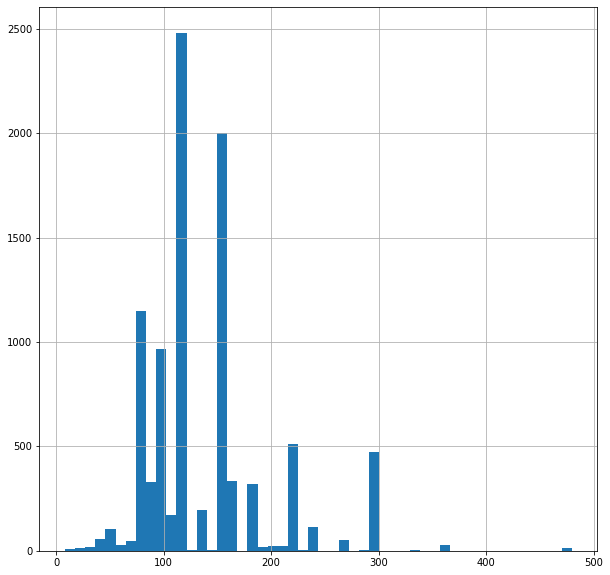

In [309]:
ods['allotted_time'].hist(bins=50, figsize=(10,10))

<AxesSubplot:>

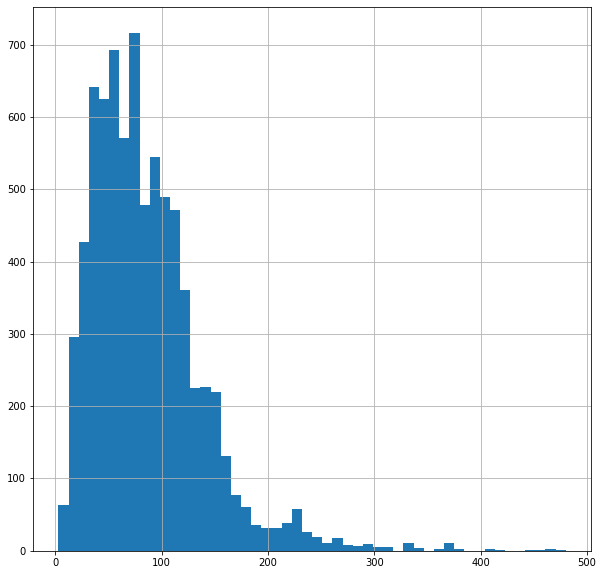

In [308]:
ods['actual_time'].hist(bins=50, figsize=(10,10))

<AxesSubplot:>

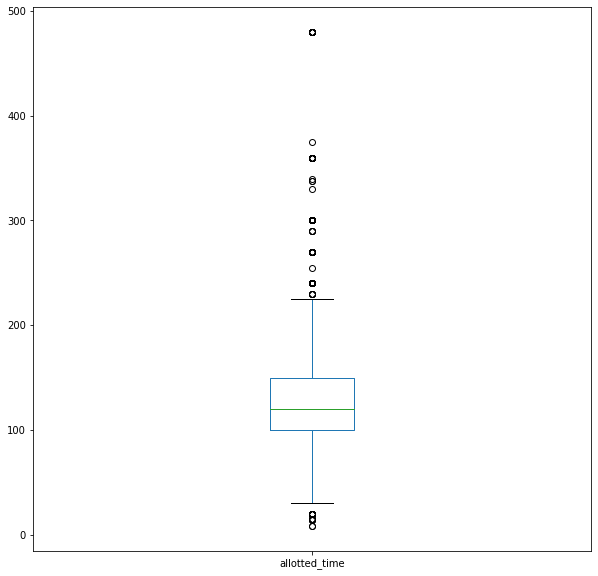

In [310]:
ods['allotted_time'].plot(kind='box', figsize=(10,10))

<AxesSubplot:>

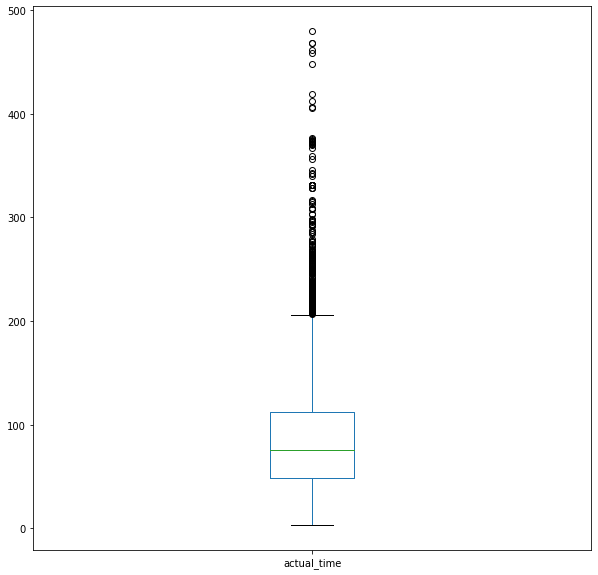

In [311]:
ods['actual_time'].plot(kind='box', figsize=(10,10))

In [312]:
ods[['allotted_time', 'actual_time', 'requested_in_advance']].describe()

,allotted_time,actual_time,requested_in_advance
count,9511.000000,7657.000000,9511.000000
mean,136.833982,86.294110,32.965724
std,59.096537,53.031853,30.838334
min,8.000000,3.000000,0.000000
25%,100.000000,49.000000,7.000000
50%,120.000000,76.000000,23.000000
75%,150.000000,112.000000,53.000000
max,480.000000,480.000000,116.000000
